<a href="https://colab.research.google.com/github/cmb170230/NLP-Portfolio/blob/main/CS_4395_Text_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [4]:
sentfile = tf.keras.utils.get_file('sld.zip', 'https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')
!unzip /root/.keras/datasets/sld.zip

Archive:  /root/.keras/datasets/sld.zip
replace sentiment labelled sentences/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sentiment labelled sentences/.DS_Store  
replace __MACOSX/sentiment labelled sentences/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
replace sentiment labelled sentences/amazon_cells_labelled.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace sentiment labelled sentences/amazon_cells_labelled.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
replace sentiment labelled sentences/imdb_labelled.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sentiment labelled sentences/imdb_labelled.txt  
replace __MACOSX/sentiment labelled sentences/._imdb_labelled.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/sentiment labelled sentences/._imdb_labelled.txt  
repl

In [ ]:
import os
os.mkdir('__MACOSX/Data')
os.mkdir('__MACOSX/Data/Negative')
os.mkdir('__MACOSX/Data/Positive')

In [2]:
restructure = open('/content/sentiment labelled sentences/amazon_cells_labelled.txt')

filelist = restructure.readlines()
restructure.close()
i = 0
for line in filelist:
  if(line[-2] == '0'):
    fileformat = '__MACOSX/Data/Negative/azero{}.txt'
    filename = fileformat.format(i)
    zerofile = open(filename, 'w')
    zerofile.write(line[0:-2])
    zerofile.close()
  else:
    fileformat = '__MACOSX/Data/Positive/aone{}.txt'
    filename = fileformat.format(i)
    onefile = open(filename, 'w')
    onefile.write(line[0:-2])
    onefile.close()
  i += 1

In [3]:
restructure = open('/content/sentiment labelled sentences/imdb_labelled.txt')

filelist = restructure.readlines()
restructure.close()
i = 0
for line in filelist:
  if(line[-2] == '0'):
    fileformat = '__MACOSX/Data/Negative/izero{}.txt'
    filename = fileformat.format(i)
    zerofile = open(filename, 'w')
    zerofile.write(line[0:-2])
    zerofile.close()
  else:
    fileformat = '__MACOSX/Data/Positive/ione{}.txt'
    filename = fileformat.format(i)
    onefile = open(filename, 'w')
    onefile.write(line[0:-2])
    onefile.close()
  i += 1

In [4]:
restructure = open('/content/sentiment labelled sentences/yelp_labelled.txt')

filelist = restructure.readlines()
restructure.close()
i = 0
for line in filelist:
  if(line[-2] == '0'):
    fileformat = '__MACOSX/Data/Negative/yzero{}.txt'
    filename = fileformat.format(i)
    zerofile = open(filename, 'w')
    zerofile.write(line[0:-2])
    zerofile.close()
  else:
    fileformat = '__MACOSX/Data/Positive/yone{}.txt'
    filename = fileformat.format(i)
    onefile = open(filename, 'w')
    onefile.write(line[0:-2])
    onefile.close()
  i += 1

In [5]:
train = tf.keras.utils.text_dataset_from_directory("__MACOSX/Data", label_mode = 'binary', 
                                                   batch_size = 50, seed = 84, validation_split = 0.2, subset = 'training')
test = tf.keras.utils.text_dataset_from_directory("__MACOSX/Data", label_mode = 'binary', 
                                                  batch_size = 50, seed = 84, validation_split = 0.2, subset = 'validation')

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [6]:
VOCAB_SIZE = 500
encoder_s = tf.keras.layers.TextVectorization(max_tokens = VOCAB_SIZE)
encoder_s.adapt(train.map(lambda text, label: text))
vocab = np.array(encoder_s.get_vocabulary())

In [7]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens = VOCAB_SIZE)
encoder.adapt(train.map(lambda text, label: text))
vocab = np.array(encoder.get_vocabulary())

In [8]:
VOCAB_SIZE = 2000
encoder = tf.keras.layers.TextVectorization(max_tokens = VOCAB_SIZE)
encoder.adapt(train.map(lambda text, label: text))
vocab = np.array(encoder.get_vocabulary())

In [9]:
# for data visualization
def get_tf_data(data):
  dat = []

  for feature_batch, label_batch in data.take(-1):
    for features, label in zip(feature_batch.numpy(), label_batch.numpy()):
      dat.append((features, label[0]))

  return dat

train_df = pd.DataFrame(get_tf_data(train), columns = ['Text', 'Sentiment'])
test_df = pd.DataFrame(get_tf_data(test), columns = ['Text', 'Sentiment'])

#Exploration of the Data

This dataset consists of 3000 reviews, 1000 from each of three sites: imdb.com, amazon.com, and yelp.com. For the purposes of this assignment, sentiment analysis was performed on reviews from all sites. The target task for these data is sentiment analysis, with 500 files containing positively labeled reviews and 500 containing negatively labeled reviews for each site.

In [10]:
catplotdata = pd.concat([train_df, test_df])
catplotdata.head()


,Text,Sentiment
0,b'My boyfriend and i sat at the bar and had a ...,1.0
1,"b""There's also enough hypocrisy in this film t...",0.0
2,b'The shrimp tender and moist.\t',1.0
3,"b""I just don't know how this place managed to ...",0.0
4,b'Food was delicious!\t',1.0


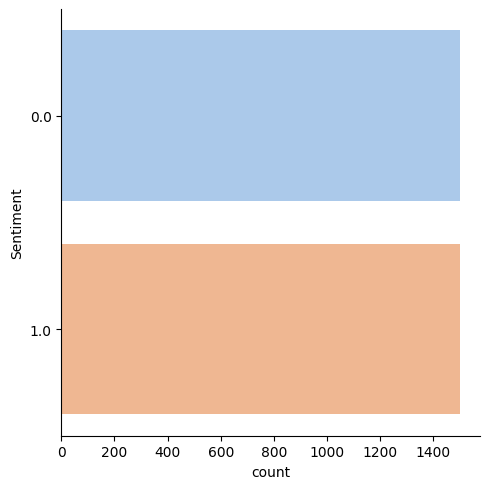

In [11]:
sns.catplot(data = catplotdata, x=None, y="Sentiment", kind="count", palette="pastel")

Using Keras Tuner, we can find the optimal hyperparameters in a reduced amount of time.

In [12]:
!pip install keras-tuner -q

In [13]:
def printplots(history):
  # Print plots
  print('---------------------------------------------------------------------')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc = 'best')
  plt.show()
  print('---------------------------------------------------------------------')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc = 'best')
  plt.show()
  print('---------------------------------------------------------------------')

In [14]:
x_train = train_df.iloc[:,0]
y_train = train_df.iloc[:,1]

x_val = test_df.iloc[:,0]
y_val = test_df.iloc[:,1]

#Sequential Model

In [19]:
import keras_tuner
def call_existing_code(units, activation, dropout, lr):
    model = keras.Sequential()
    model.add(encoder)
    model.add(keras.layers.Embedding(
        input_dim = len(encoder.get_vocabulary()),
        output_dim = units,
        # Use masking to handle the variable sequence lengths
        mask_zero = True))
    model.add(keras.layers.Conv1D(units, 3, activation=activation, input_shape=(None, None, units)))
    #model.add(keras.layers.Dense(units=units, activation=activation))
    if dropout:
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(units/2, activation=activation))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"],
    )
    return model


def build_model(hp):
    units = hp.Int("units", min_value=64, max_value=384, step=64)
    activation = hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2)
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        units=units, activation=activation, dropout=dropout, lr=lr
    )
    return model

In [20]:
testmod_s = build_model(keras_tuner.HyperParameters())
testmod_s.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 64)          128000    
                                                                 
 conv1d (Conv1D)             (None, None, 64)          12352     
                                                                 
 dense (Dense)               (None, None, 32)          2080      
                                                                 
 dense_1 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 142,465
Trainable params: 142,465
Non-trainable params: 0
__________________________________________________

In [21]:
testmod_s.fit(train, epochs=10, validation_data=test)

Epoch 1/10
48/48 [==============================] - 27s 293ms/step - loss: 0.6931 - accuracy: 0.5083 - val_loss: 0.6934 - val_accuracy: 0.4898
Epoch 2/10
48/48 [==============================] - 4s 85ms/step - loss: 0.6928 - accuracy: 0.5201 - val_loss: 0.6933 - val_accuracy: 0.4942
Epoch 3/10
48/48 [==============================] - 3s 63ms/step - loss: 0.6925 - accuracy: 0.5290 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 4/10
48/48 [==============================] - 3s 54ms/step - loss: 0.6921 - accuracy: 0.5380 - val_loss: 0.6927 - val_accuracy: 0.5086
Epoch 5/10
48/48 [==============================] - 1s 25ms/step - loss: 0.6916 - accuracy: 0.5467 - val_loss: 0.6921 - val_accuracy: 0.5208
Epoch 6/10
48/48 [==============================] - 2s 33ms/step - loss: 0.6905 - accuracy: 0.5559 - val_loss: 0.6910 - val_accuracy: 0.5208
Epoch 7/10
48/48 [==============================] - 1s 21ms/step - loss: 0.6890 - accuracy: 0.5594 - val_loss: 0.6897 - val_accuracy: 0.5285
Epoch 8/10


In [ ]:
os.mkdir("/content/seqtrials/")

In [22]:
build_model(keras_tuner.HyperParameters())
tuner2 = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective="val_accuracy",
    max_consecutive_failed_trials=10,
    directory="/content/seqtrials/",
    project_name="sequential"
)

tuner2.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 384, 'step': 64, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'linear'}


In [ ]:
tuner2.search(train, epochs=2, validation_data=test)

Trial 126 Complete [00h 00m 29s]
val_accuracy: 0.536076009273529

Best val_accuracy So Far: 0.5710269212722778
Total elapsed time: 00h 32m 59s

Search: Running Trial #127

Value             |Best Value So Far |Hyperparameter
384               |384               |units
relu              |relu              |activation
False             |True              |dropout
0.00090541        |0.0049545         |lr
4                 |2                 |tuner/epochs
2                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
1                 |0                 |tuner/round
0086              |None              |tuner/trial_id

Epoch 3/4
 3/48 [>.............................] - ETA: 2:51 - loss: 0.6749 - accuracy: 0.5553

In [ ]:
'''
Value             |Best Value So Far |Hyperparameter
320               |192               |units
relu              |tanh              |activation
True              |True              |dropout
0.00021506        |0.00065396        |lr
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round
'''

In [15]:
def build_best_seq(units=384, activation='relu', dropout=True, lr=0.0049545):
    model = keras.Sequential()
    model.add(encoder)
    model.add(keras.layers.Embedding(
        input_dim = len(encoder.get_vocabulary()),
        output_dim = units,
        # Use masking to handle the variable sequence lengths
        mask_zero = True))
    model.add(keras.layers.Conv1D(units, 3, activation=activation, input_shape=(None, None, units)))
    #model.add(keras.layers.Dense(units=units, activation=activation))
    if dropout:
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(units/2, activation=activation))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"],
    )
    return model

In [16]:
bestSeq = build_best_seq()
bestSeq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 384)         768000    
                                                                 
 conv1d (Conv1D)             (None, None, 384)         442752    
                                                                 
 dropout (Dropout)           (None, None, 384)         0         
                                                                 
 dense (Dense)               (None, None, 192)         73920     
                                                                 
 dense_1 (Dense)             (None, None, 1)           193       
                                                        

Epoch 1/50
48/48 [==============================] - 25s 326ms/step - loss: 0.6881 - accuracy: 0.5300 - val_loss: 0.6662 - val_accuracy: 0.5345
Epoch 2/50
48/48 [==============================] - 6s 120ms/step - loss: 0.6465 - accuracy: 0.5666 - val_loss: 0.6677 - val_accuracy: 0.5319
Epoch 3/50
48/48 [==============================] - 3s 59ms/step - loss: 0.6307 - accuracy: 0.5734 - val_loss: 0.6859 - val_accuracy: 0.5235
Epoch 4/50
48/48 [==============================] - 3s 63ms/step - loss: 0.6167 - accuracy: 0.5820 - val_loss: 0.6991 - val_accuracy: 0.5293
Epoch 5/50
48/48 [==============================] - 2s 47ms/step - loss: 0.6063 - accuracy: 0.5846 - val_loss: 0.7114 - val_accuracy: 0.5342
Epoch 6/50
48/48 [==============================] - 2s 39ms/step - loss: 0.5982 - accuracy: 0.5955 - val_loss: 0.7293 - val_accuracy: 0.5266
Epoch 7/50
48/48 [==============================] - 1s 26ms/step - loss: 0.5907 - accuracy: 0.5985 - val_loss: 0.7672 - val_accuracy: 0.5343
Epoch 8/50

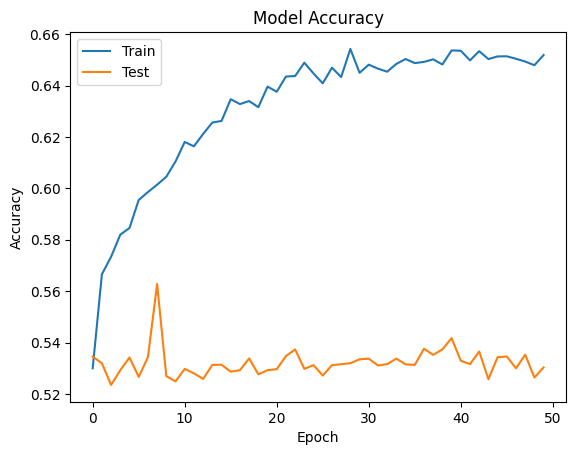

---------------------------------------------------------------------


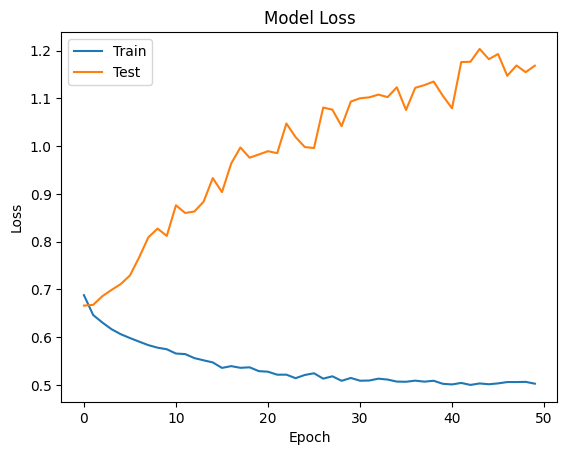

---------------------------------------------------------------------


In [17]:
history = bestSeq.fit(train, epochs=50, validation_data=test)
printplots(history)

19/19 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

    negative       0.86      0.67      0.75       314
    positive       0.71      0.88      0.79       286

    accuracy                           0.77       600
   macro avg       0.79      0.78      0.77       600
weighted avg       0.79      0.77      0.77       600



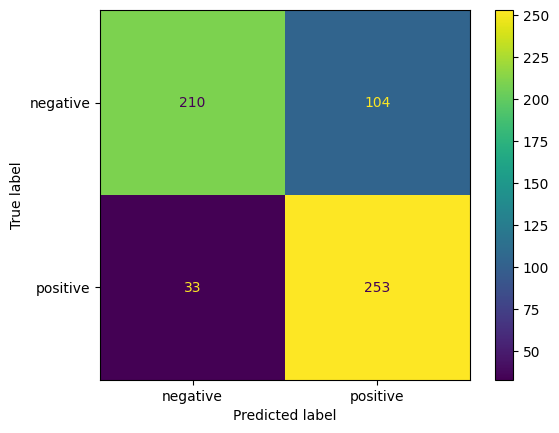

In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

mappings = {0 : 'negative', 1 : 'positive'}

# Predict on the test data and print evaluation metrics
preds = bestSeq.predict(x_val)
preds = [1.0 if np.sum(p)/len(p) >= 0.5 else 0.0 for p in preds]
print(classification_report(y_val, preds, target_names = mappings.values()))
ConfusionMatrixDisplay.from_predictions(y_val, preds, display_labels = mappings.values())

##Bidirectional LSTM

In [17]:
import keras_tuner
def call_existing_code(units, activation, dropout, lr):
    model = keras.Sequential()
    model.add(encoder)
    model.add(keras.layers.Embedding(
        input_dim = len(encoder.get_vocabulary()),
        output_dim = units,
        # Use masking to handle the variable sequence lengths
        mask_zero = True))
   
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units)))
    if dropout:
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(units/2, activation=activation))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"],
    )
    return model


def build_model(hp):
    units = hp.Int("units", min_value=64, max_value=1024, step=64)
    activation = hp.Choice("activation", ["relu", "tanh"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-5, max_value=1e-3)
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        units=units, activation=activation, dropout=dropout, lr=lr
    )
    return model

In [18]:
testmod = build_model(keras_tuner.HyperParameters())
testmod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 64)          128000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 198,209
Trainable params: 198,209
Non-trai

In [19]:
testmod.fit(test, validation_data=test)

12/12 [==============================] - 25s 422ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
build_model(keras_tuner.HyperParameters())
tuner = keras_tuner.Hyperband(
    hypermodel=build_model,
    objective="val_accuracy",
    max_consecutive_failed_trials=10
)

tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 1024, 'step': 64, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.001, 'step': None, 'sampling': 'linear'}


In [21]:
tuner.search(train, epochs=2, validation_data=test)

Trial 64 Complete [00h 00m 35s]
val_accuracy: 0.8066666722297668

Best val_accuracy So Far: 0.8550000190734863
Total elapsed time: 00h 34m 41s

Search: Running Trial #65

Value             |Best Value So Far |Hyperparameter
512               |640               |units
relu              |relu              |activation
False             |False             |dropout
0.00092111        |0.00073133        |lr
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
48/48 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.6958

KeyboardInterrupt: ignored

In [ ]:
'''
Trial 63 Complete [00h 00m 34s]
val_accuracy: 0.824999988079071

Best val_accuracy So Far: 0.8550000190734863
Total elapsed time: 00h 34m 06s

Search: Running Trial #64

Value             |Best Value So Far |Hyperparameter
704               |640               |units
relu              |relu              |activation
True              |False             |dropout
0.00025458        |0.00073133        |lr
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round
'''

In [23]:
def build_best_BiLSTM(units=640, activation='relu', dropout=False, lr=0.0073133):
    model = keras.Sequential()
    model.add(encoder)
    model.add(keras.layers.Embedding(
        input_dim = len(encoder.get_vocabulary()),
        output_dim = units,
        # Use masking to handle the variable sequence lengths
        mask_zero = True))
   
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units)))
    if dropout:
        model.add(keras.layers.Dropout(rate=0.25))
    model.add(keras.layers.Dense(units/2, activation=activation))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"],
    )
    return model

bestLSTM = build_best_BiLSTM()
bestLSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, None, 640)         1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 1280)             6558720   
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 320)               409920    
                                                                 
 dense_5 (Dense)             (None, 1)                 321       
                                                                 
Total params: 8,248,961
Trainable params: 8,248,961
No

Epoch 1/10
12/12 [==============================] - 14s 427ms/step - loss: 0.9043 - accuracy: 0.5133 - val_loss: 0.7210 - val_accuracy: 0.5033
Epoch 2/10
12/12 [==============================] - 2s 158ms/step - loss: 0.7020 - accuracy: 0.5267 - val_loss: 0.6687 - val_accuracy: 0.5617
Epoch 3/10
12/12 [==============================] - 2s 182ms/step - loss: 0.6662 - accuracy: 0.6050 - val_loss: 0.6232 - val_accuracy: 0.6783
Epoch 4/10
12/12 [==============================] - 3s 237ms/step - loss: 0.5960 - accuracy: 0.7117 - val_loss: 0.5567 - val_accuracy: 0.7000
Epoch 5/10
12/12 [==============================] - 2s 110ms/step - loss: 0.3834 - accuracy: 0.8433 - val_loss: 0.2121 - val_accuracy: 0.9283
Epoch 6/10
12/12 [==============================] - 1s 110ms/step - loss: 0.1874 - accuracy: 0.9317 - val_loss: 0.0795 - val_accuracy: 0.9767
Epoch 7/10
12/12 [==============================] - 1s 105ms/step - loss: 0.0787 - accuracy: 0.9633 - val_loss: 0.0796 - val_accuracy: 0.9750
Epoch

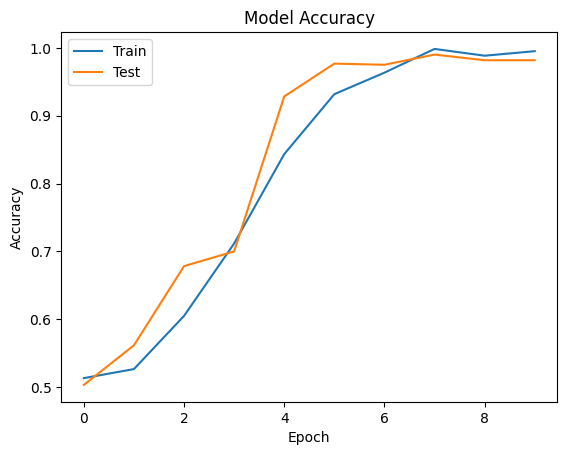

---------------------------------------------------------------------


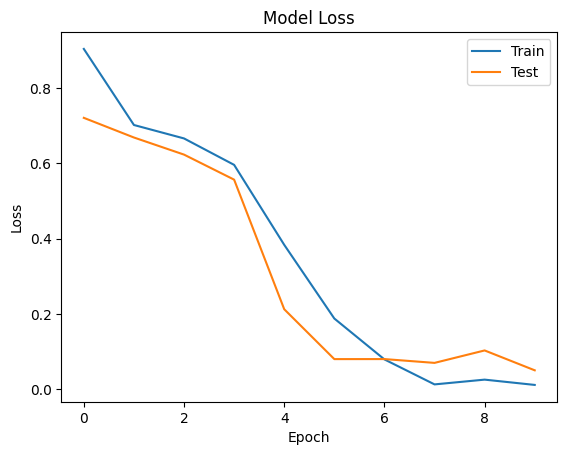

---------------------------------------------------------------------


In [25]:
history = bestLSTM.fit(test, epochs=10, validation_data=test)
printplots(history)

19/19 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       314
    positive       1.00      1.00      1.00       286

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



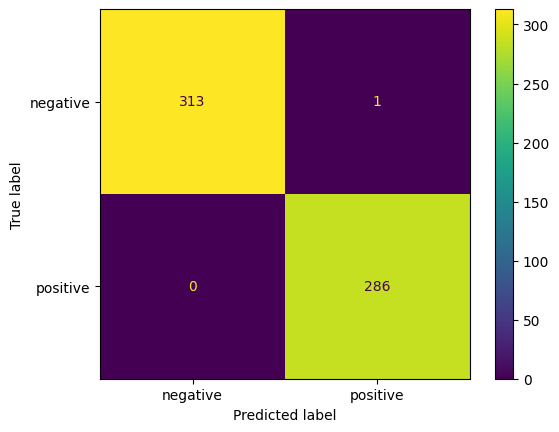

In [37]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

mappings = {0 : 'negative', 1 : 'positive'}

# Predict on the test data and print evaluation metrics
preds = bestLSTM.predict(x_val)
preds = [1.0 if p>= 0.5 else 0.0 for p in preds]
print(classification_report(y_val, preds, target_names = mappings.values()))
ConfusionMatrixDisplay.from_predictions(y_val, preds, display_labels = mappings.values())

Overall, the best embedding approach was the one that allowed for the largest vocabulary size. Between the regular sequential model and the bidirectional LSTM, the LSTM is the clear favorite due to the stellar performance and adequately small train time. The sequential network had a hard time working with this data, refusing to compile without the convolutional layer as a buffer between the embedding and dense layers. I suspect that the abysmal performance is due to predictive features being lost in the convolution proccess. I am also skeptical about the interpretability of the sklearn metrics/confusion matrix due to the prediction data manipulation necessary.